In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
%%time
features = pd.read_csv('features.csv', sep='\t')
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')
features.head()

CPU times: user 1min 32s, sys: 9.97 s, total: 1min 42s
Wall time: 1min 46s


,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [3]:
%%time
train_df = pd.merge_asof(train.sort_values('id'),
                         features.sort_values('id'),
                         on='id', by='buy_time', direction='backward' )

test_df = pd.merge_asof(test.sort_values('id'),
                        features.sort_values('id'),
                        on='id', by='buy_time', direction='backward' )

train_df.head()

CPU times: user 5.56 s, sys: 21.6 s, total: 27.1 s
Wall time: 1min 15s


,Unnamed: 0_x,id,vas_id,buy_time,target,Unnamed: 0_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,116,2,2.0,1545598800,0.0,2966746.0,-96.799971,229.530888,-110.740786,305.723202,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,213,4,1.0,1533502800,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,499,15,1.0,1534107600,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,513,16,2.0,1540760400,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,904,29,1.0,1533502800,0.0,1792640.0,-52.309971,-225.139112,-66.250786,-258.246798,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [4]:
train_df.isnull().sum()

Unnamed: 0_x    0
id              0
vas_id          0
buy_time        0
target          0
               ..
248             4
249             4
250             4
251             4
252             4
Length: 259, dtype: int64

In [5]:
train_df = train_df.loc[train_df['0'].notnull()]
train_df['0'].isnull().sum()

0

In [6]:
train_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
test_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
test_df.head(2)

,id,vas_id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,55,2.0,1547413200,-27.139971,-207.729112,-10.930786,-165.866798,-16.348246,-186.97179,-16.08618,...,-977.373846,-613.770792,-25.996269,-9.630448,-216.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,64,4.0,1548018000,-96.799971,-407.009112,-110.740786,-459.616798,-116.158246,-480.72179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [7]:
train_df.shape

(831649, 257)

### Уменьшение размеров датасета
Уменьшим количество признаков с помощью определения коллинеарных признаков, удалим константные признаки, а также уменьшим объем занимаемой памяти датасета с помощью функции, которая преобразовывает типы данных.

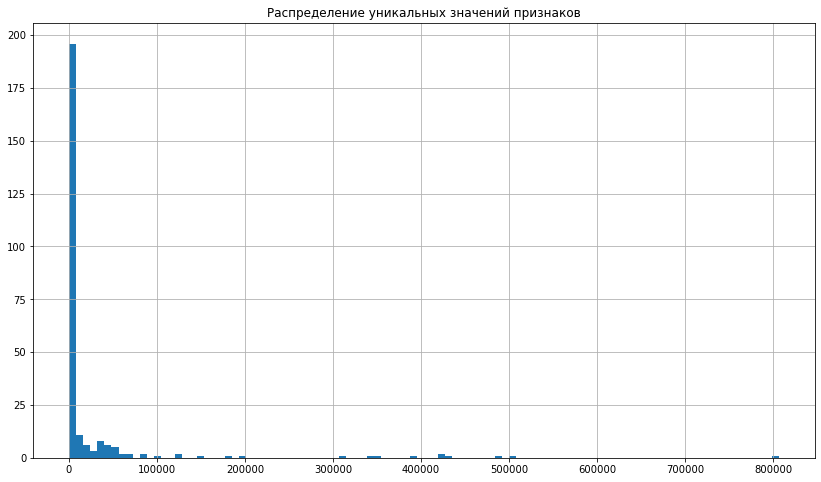

In [8]:
X_nunique = train_df.apply(lambda x: x.nunique(dropna=False))

plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(14, 8));

In [9]:
# всего призков (удалим из них buy_time, id, target, vas_id)
all_ = set(X_nunique.index.tolist()[4:])

#Константные признаки (принимают только одно значение - их можно удалить)
const = set(X_nunique[X_nunique == 1].index.tolist())

# Числовые признаки
numeric = (train_df.fillna(0).astype(int).sum() - train_df.fillna(0).sum()).abs()
numeric = set(numeric[numeric > 0].index.tolist())
other = all_ - (numeric | const)

# Бинарные признаки
binary = set(train_df.loc[:, other].columns[(
        (train_df.loc[:, other].max() == 1) &
        (train_df.loc[:, other].min() == 0) &
        (train_df.loc[:, other].isnull().sum() == 0))])

# Категориальные признаки
categorical = set(X_nunique.loc[other][X_nunique.loc[other] <= 30].index.tolist())
numeric_extra = categorical

other = other - categorical
numeric = numeric | other

print('Всего признаков (из них было удалено 4):', train_df.shape[1] - 4)
print('Константные признаки:', len(const))
print('Бинарные признаки:', len(binary))
print('Категориальные:', len(categorical))
print('Вещественные признаки:', len(numeric))
train_df.shape, test_df.shape

Всего признаков (из них было удалено 4): 253
Константные признаки: 5
Бинарные признаки: 0
Категориальные: 0
Вещественные признаки: 248


((831649, 257), (71231, 256))

In [31]:
const = list(const)
train_df = train_df.loc[:, ~train_df.columns.isin(const)]
test_df = test_df.loc[:, ~test_df.columns.isin(const)]
train_df.shape, test_df.shape

((831649, 252), (71231, 251))

In [32]:
def remove_collinear_features(df_model, target_var, threshold, verbose):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold and which have the least correlation with the target (dependent) variable. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        df_model: features dataframe
        target_var: target (dependent) variable
        threshold: features with correlations greater than this value are removed
        verbose: set to "True" for the log printing

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = df_model.drop(target_var, 1).corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    dropped_feature = ""

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                if verbose:
                    print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                col_value_corr = df_model[col.values[0]].corr(df_model[target_var])
                row_value_corr = df_model[row.values[0]].corr(df_model[target_var])
                if verbose:
                    print("{}: {}".format(col.values[0], np.round(col_value_corr, 3)))
                    print("{}: {}".format(row.values[0], np.round(row_value_corr, 3)))
                if col_value_corr < row_value_corr:
                    drop_cols.append(col.values[0])
                    dropped_feature = "dropped: " + col.values[0]
                else:
                    drop_cols.append(row.values[0])
                    dropped_feature = "dropped: " + row.values[0]
                if verbose:
                    print(dropped_feature)
                    print("-"*80)

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df_model = df_model.drop(columns=drops)

    print("dropped columns: ")
    print(list(drops))
    print("-"*80)
    print("used columns: ")
    print(df_model.columns.tolist())

    return df_model

In [33]:
train_df = remove_collinear_features(train_df, 'target', 0.75, verbose=True)

/var/folders/s5/6yjf0_gx61g9wqrz0b0sxrxc0000gn/T/ipykernel_72577/2044375005.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corr_matrix = df_model.drop(target_var, 1).corr()


2 | 0 | 0.95
2: -0.004
0: -0.003
dropped: 2
-----------------------------------------------------------------------------
3 | 1 | 0.93
3: -0.007
1: -0.007
dropped: 1
-----------------------------------------------------------------------------
4 | 0 | 0.91
4: -0.005
0: -0.003
dropped: 4
-----------------------------------------------------------------------------
4 | 2 | 0.95
4: -0.005
2: -0.004
dropped: 4
-----------------------------------------------------------------------------
5 | 1 | 0.88
5: -0.01
1: -0.007
dropped: 5
-----------------------------------------------------------------------------
5 | 3 | 0.94
5: -0.01
3: -0.007
dropped: 5
-----------------------------------------------------------------------------
13 | 0 | 0.77
13: 0.001
0: -0.003
dropped: 0
-----------------------------------------------------------------------------
14 | 0 | 0.81
14: -0.0
0: -0.003
dropped: 0
-----------------------------------------------------------------------------
14 | 2 | 0.77
14: -0.0
2:

In [34]:
target = 'target'
columns = list(train_df.columns)
columns.remove(target)
columns

['id',
 'vas_id',
 'buy_time',
 '3',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '15',
 '16',
 '17',
 '18',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '31',
 '32',
 '34',
 '36',
 '37',
 '39',
 '42',
 '47',
 '48',
 '49',
 '56',
 '57',
 '58',
 '59',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '74',
 '76',
 '78',
 '80',
 '82',
 '84',
 '86',
 '88',
 '89',
 '90',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '102',
 '103',
 '105',
 '106',
 '107',
 '109',
 '110',
 '113',
 '114',
 '115',
 '117',
 '119',
 '120',
 '121',
 '122',
 '123',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '136',
 '140',
 '141',
 '142',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '163',
 '164',
 '166',
 '167',
 '168',
 '174',
 '176',
 '178',
 '180',
 '184',
 '190',
 '191',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200

In [35]:
test_df = test_df[columns]
test_df.shape, train_df.shape

((71231, 179), (831649, 180))

In [36]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [37]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 1148.44 MB
Memory usage after optimization is: 577.39 MB
Decreased by 49.7%
Memory usage of dataframe is 97.82 MB
Memory usage after optimization is: 49.18 MB
Decreased by 49.7%


In [38]:
test_df.shape, train_df.shape

((71231, 179), (831649, 180))

### Сохранение готовых датасетов
Сохраним преобразованные датасеты в файлы для дальнейшей работы с ними

In [39]:
train_df.to_csv('train_df.csv', index=False, encoding='utf-8')
test_df.to_csv('test_df.csv', index=False, encoding='utf-8')

In [ ]:
# IMAGES_PATH = Path(__file__).parent.joinpath('data')
# if not IMAGES_PATH.exists():
#     IMAGES_PATH.mkdir()